<a href="https://colab.research.google.com/github/atulpatil2228/Solving_unsolved_problems_ML/blob/main/Object_detectection_text_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install ultralytics -U


In [29]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [30]:
%pwd

'/content'

In [31]:
!mkdir ObjectDetection1


mkdir: cannot create directory ‘ObjectDetection1’: File exists


In [32]:
path = "/content/ObjectDetection1"

In [33]:
!pwd

/content


In [34]:
import os
os.chdir("/content/ObjectDetection1")
!pwd

/content/ObjectDetection1


In [35]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yN2kpHu7hdVoA3hyLzHu")
project = rf.workspace("galuh-4yrck").project("vehicle-number-plate-xkced")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


# Train the YOLOv8 over a custom Dataset

In [36]:
os.chdir("/content/ObjectDetection1/vehicle-number-plate-1")

In [37]:
## Traning the data
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640 batch=16

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

In [38]:
!ls /content/ObjectDetection1/vehicle-number-plate-1/runs/detect/train/

args.yaml			 confusion_matrix.png	 train_batch1.jpg
BoxF1_curve.png			 labels_correlogram.jpg  train_batch2.jpg
BoxP_curve.png			 labels.jpg		 val_batch0_labels.jpg
BoxPR_curve.png			 results.csv		 val_batch0_pred.jpg
BoxR_curve.png			 results.png		 weights
confusion_matrix_normalized.png  train_batch0.jpg


In [39]:
result_data = "/content/ObjectDetection1/vehicle-number-plate-1/runs/detect/train/"
from IPython.display import Image,display

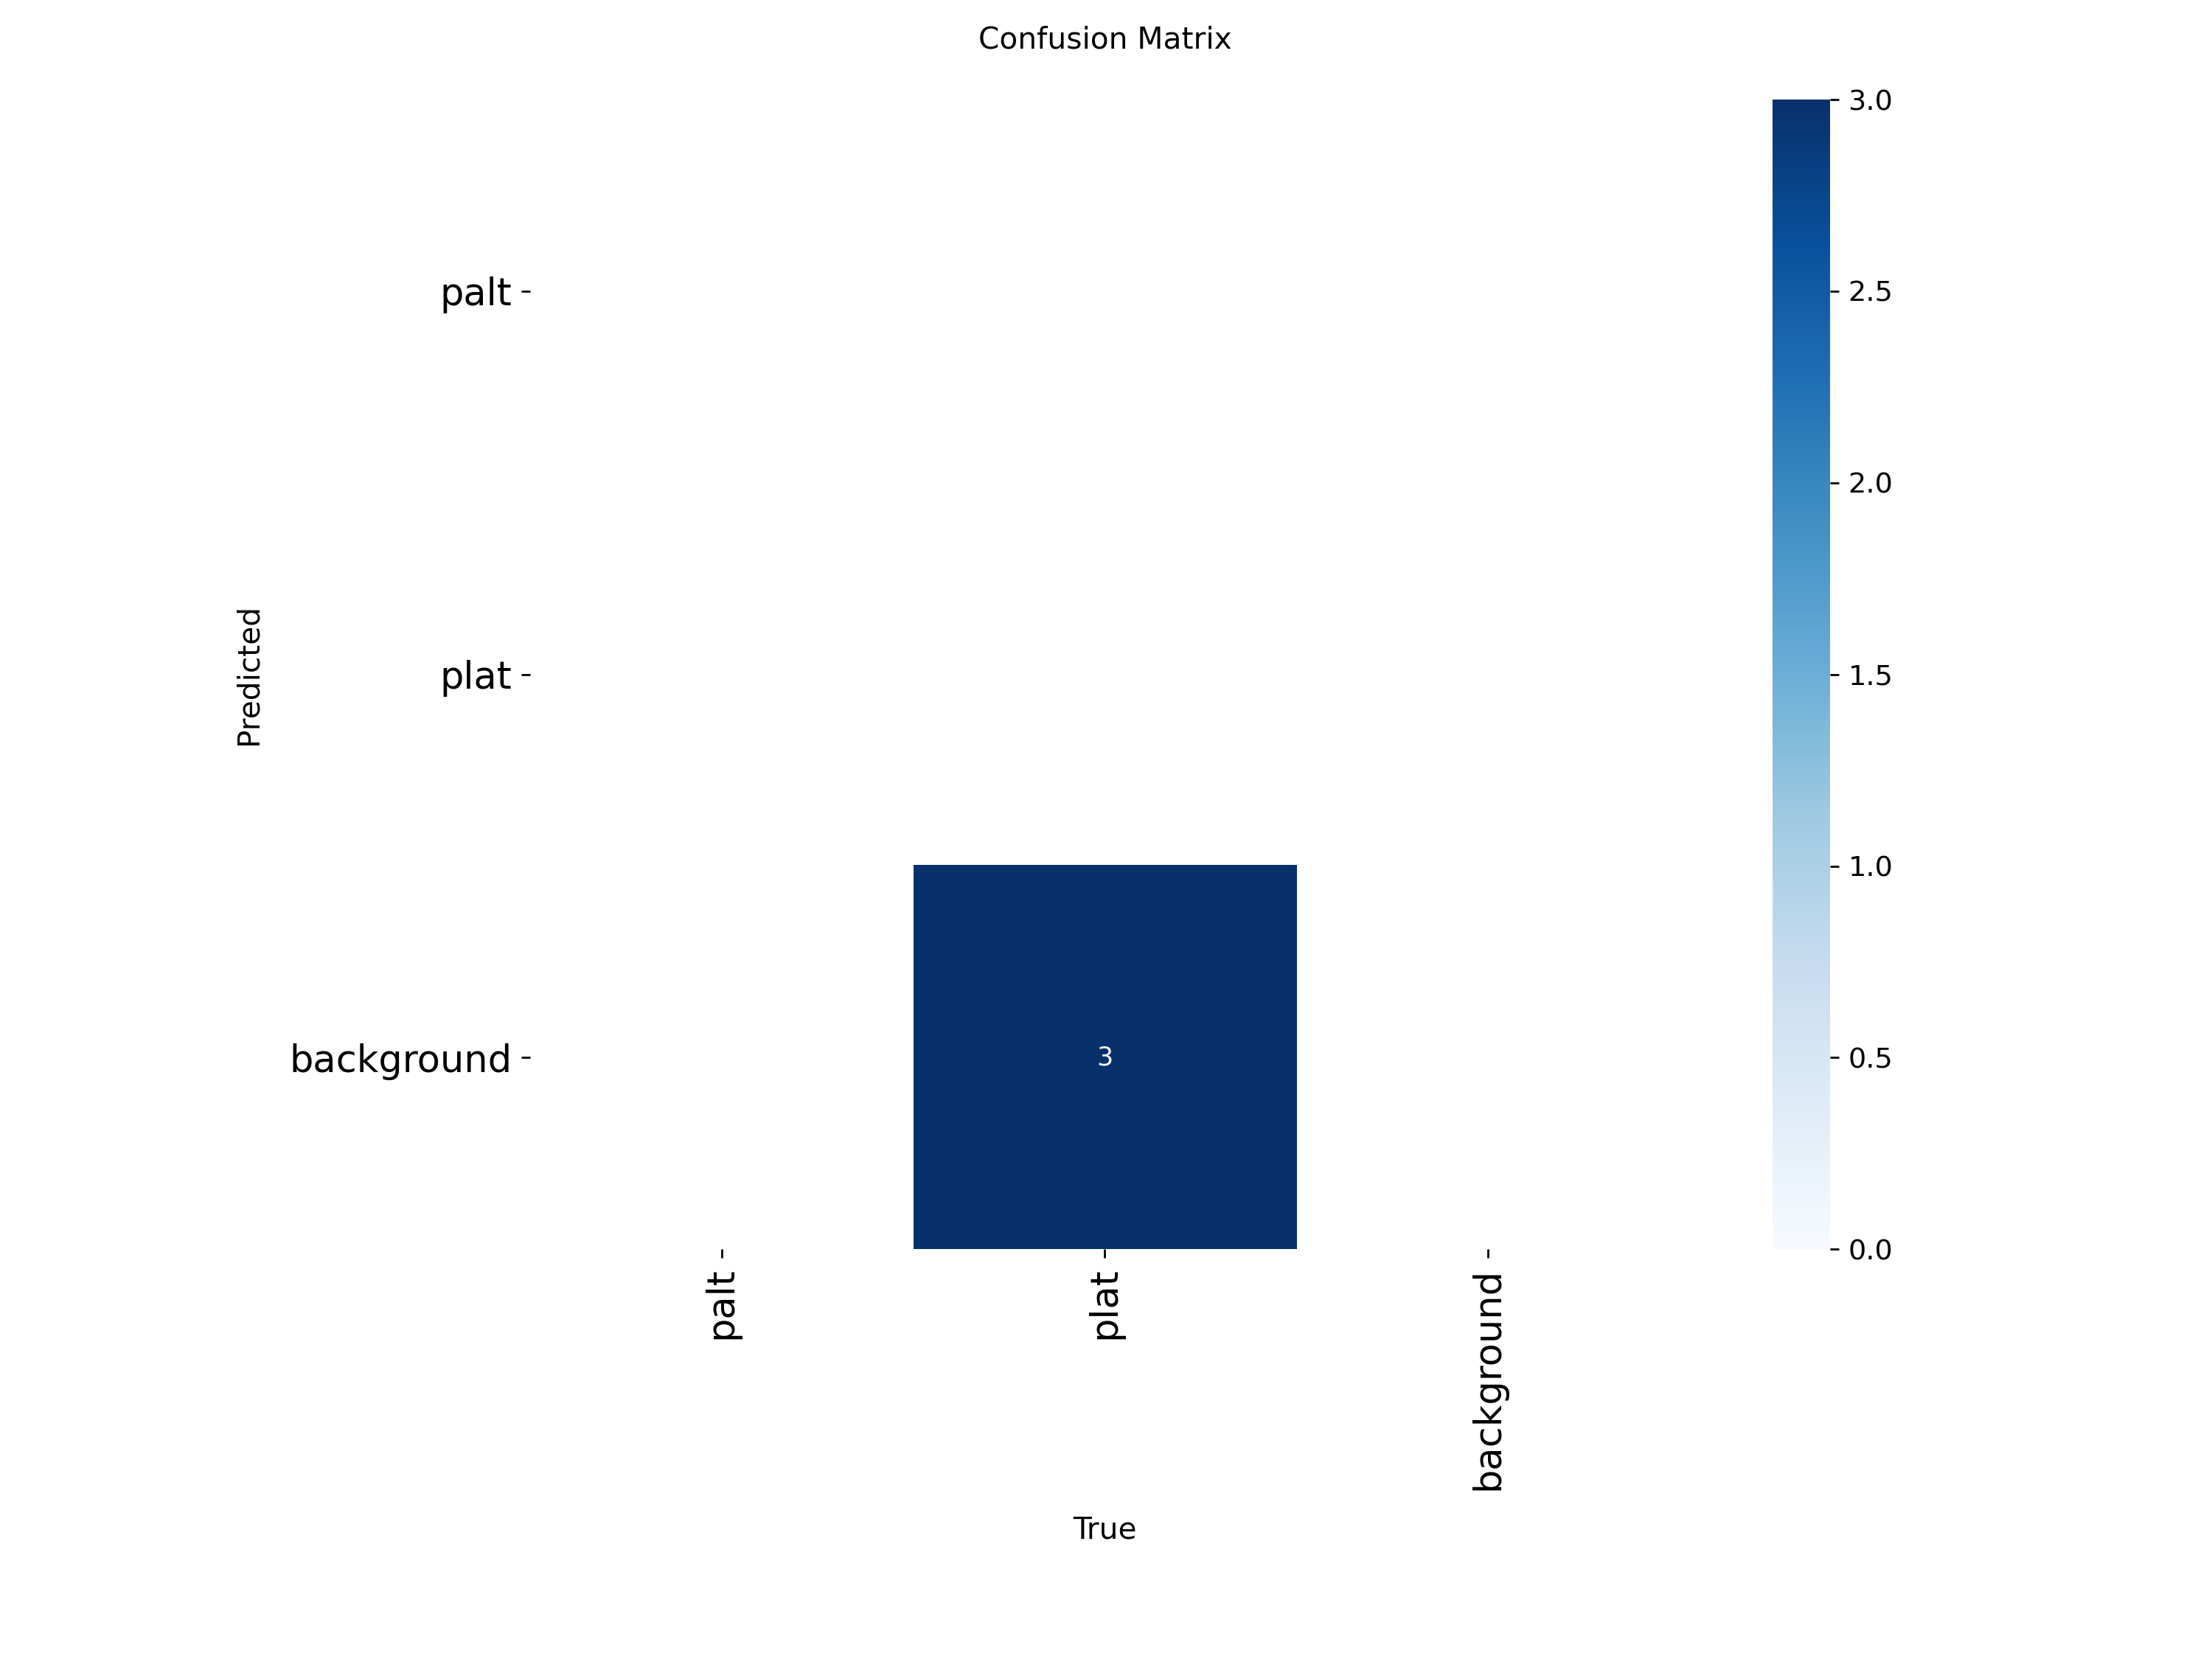

In [40]:
Image(filename=f'{result_data}confusion_matrix.png'	)

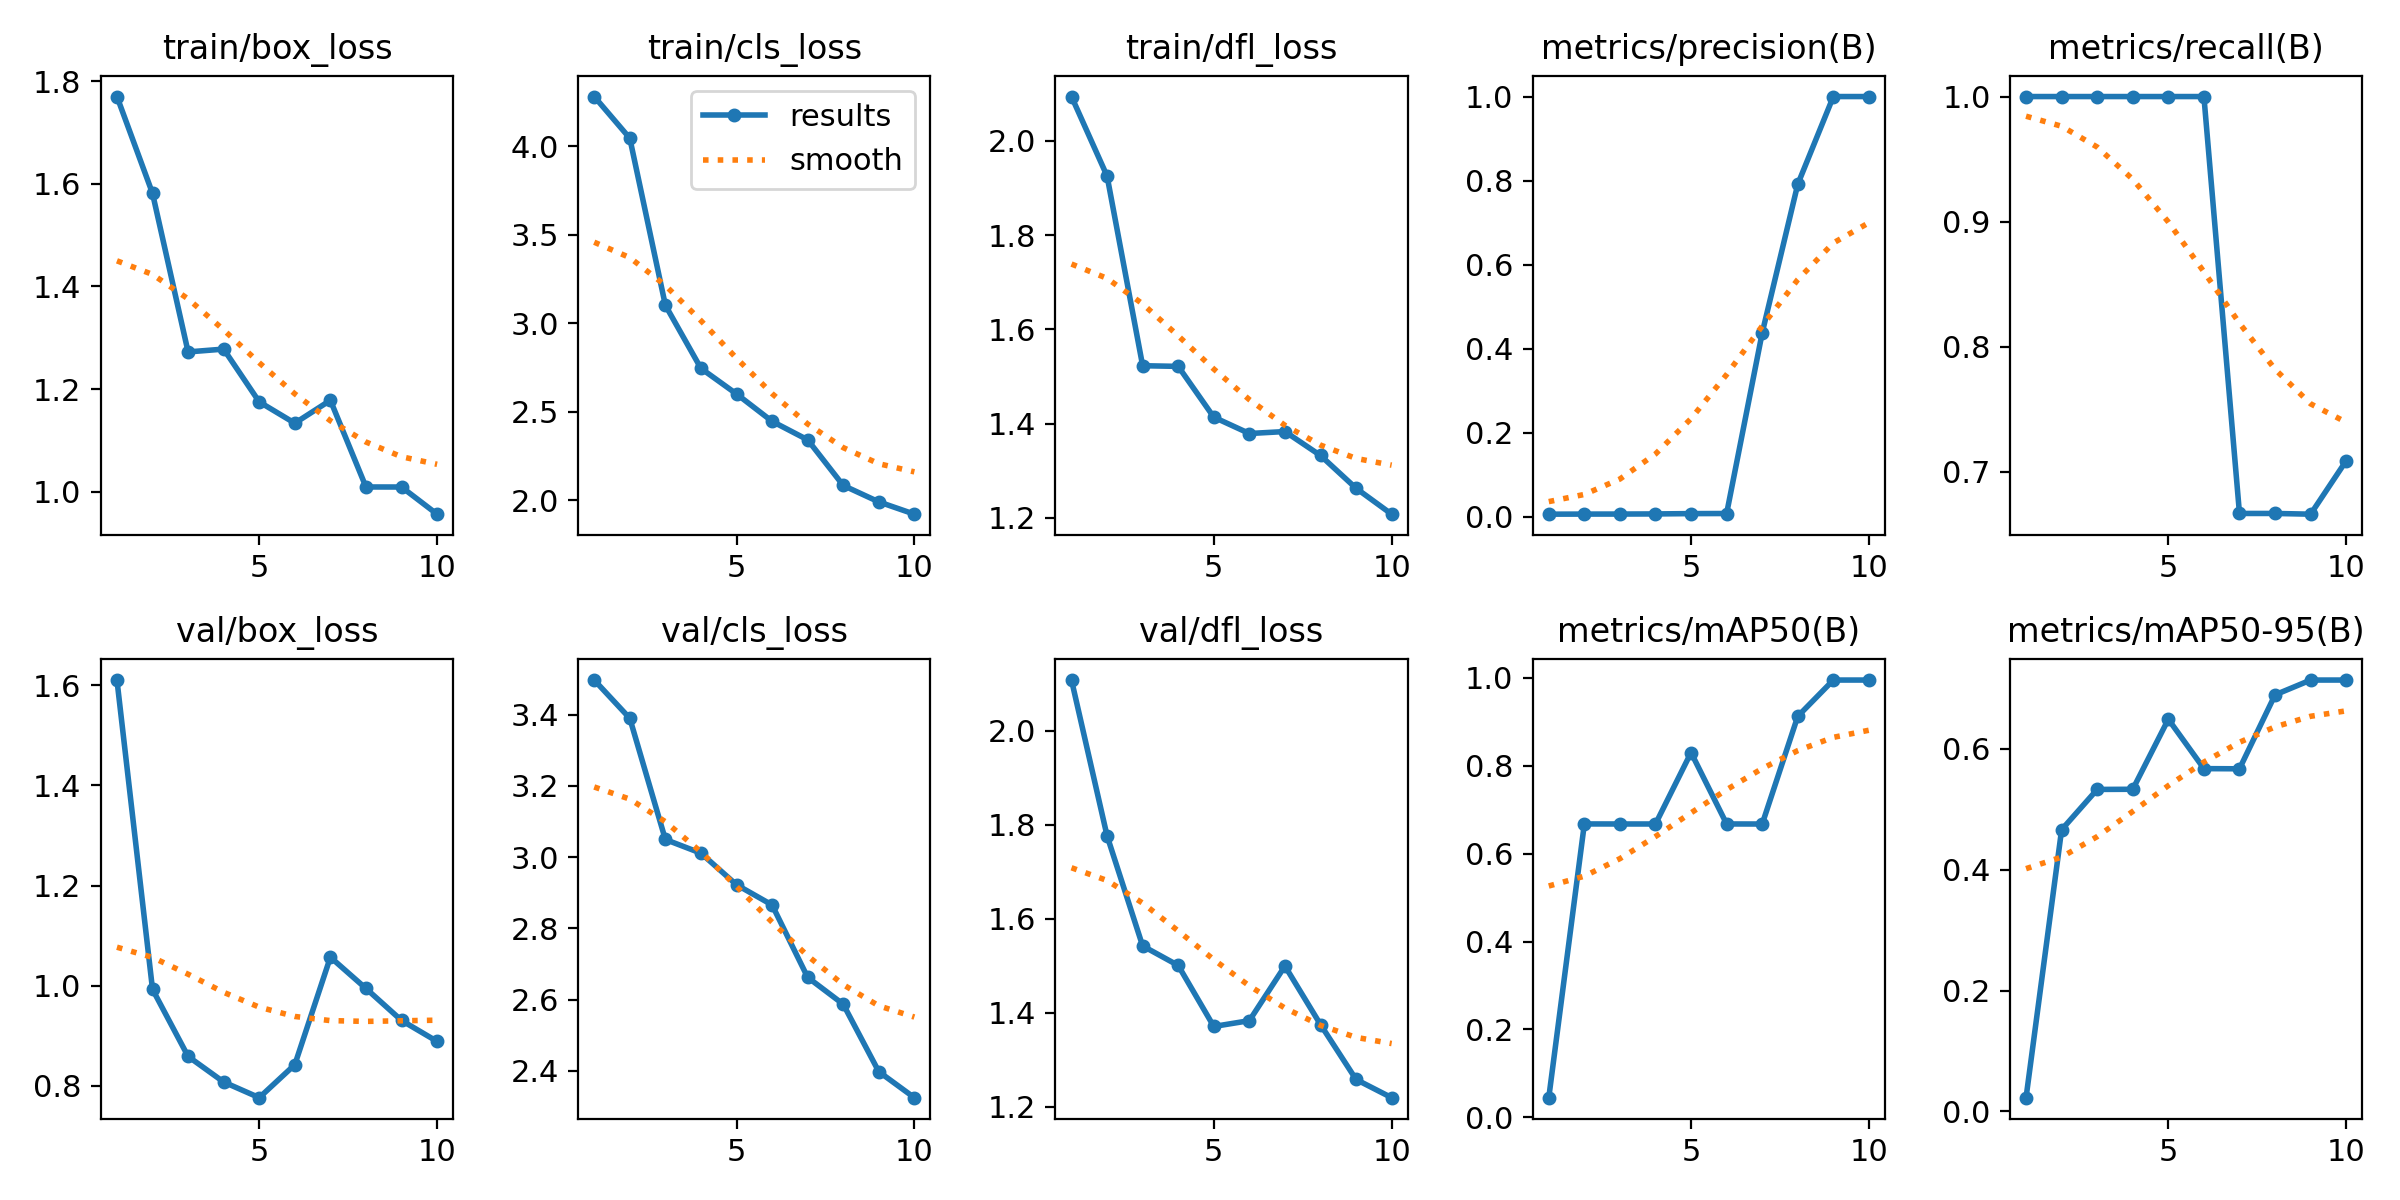

In [41]:
Image(filename=f'{result_data}results.png'	)

In [42]:
import pandas as pd


csv_path = "/content/ObjectDetection1/vehicle-number-plate-1/runs/detect/train/results.csv"   # adjust path if different


df = pd.read_csv(csv_path)


print(df.tail(10))


   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   6.06801         1.76998         4.27947         2.09405   
1      2   7.60546         1.58142         4.04414         1.92533   
2      3   9.05068         1.27245         3.10099         1.52280   
3      4  10.28620         1.27793         2.74451         1.52140   
4      5  11.90140         1.17511         2.60007         1.41362   
5      6  13.30210         1.13358         2.44543         1.37891   
6      7  14.85380         1.17823         2.34100         1.38310   
7      8  16.08230         1.00932         2.08329         1.33228   
8      9  17.95390         1.00923         1.99051         1.26269   
9     10  20.44670         0.95632         1.92107         1.20774   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00580            1.00000           0.04469   
1               0.00601            1.00000           0.66757   
2               0.00609            1.

In [43]:
%pwd

'/content/ObjectDetection1/vehicle-number-plate-1'

In [44]:
os.chdir("/content/")

In [45]:
%pwd

'/content'

In [46]:
!mkdir ManualTestingData

mkdir: cannot create directory ‘ManualTestingData’: File exists


In [47]:
weights_Path = "/content/ObjectDetection1/vehicle-number-plate-1/runs/detect/train/weights"
!yolo task=detect mode=predict model={weights_Path}/best.pt conf=.01 source=/content/c2.jpg

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/c2.jpg: 256x640 1 plat, 70.5ms
Speed: 2.6ms preprocess, 70.5ms inference, 215.5ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


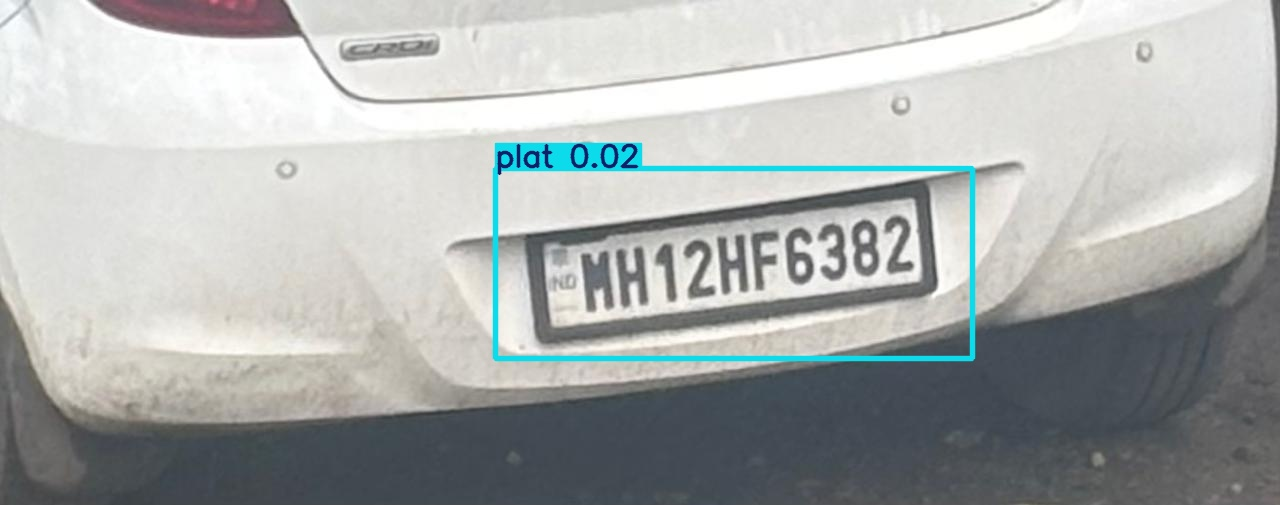

In [48]:
from IPython.display import Image
Image(filename="runs/detect/predict/c2.jpg")


In [49]:
results_path = "/content/ObjectDetection1/vehicle-number-plate-1/runs/detect/predict"
label_path = f"{results_path}/labels/c2.txt"


In [50]:
weights_Path = "/content/ObjectDetection1/vehicle-number-plate-1/runs/detect/train/weights"

!yolo task=detect mode=predict model={weights_Path}/best.pt conf=0.01 source=/content/c2.jpg save_txt=True


Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/c2.jpg: 256x640 1 plat, 48.6ms
Speed: 3.1ms preprocess, 48.6ms inference, 151.4ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict4
1 label saved to runs/detect/predict4/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [51]:

!apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [52]:
#results_path = "/content/ObjectDetection1/vehicle-number-plate-1/runs/detect/predict2"
#label_path = f"{results_path}/labels/c2.txt"


In [53]:
results_path = "/content/ObjectDetection1/vehicle-number-plate-1/runs/detect/predict2"
label_path = f"{results_path}/labels/c2.txt"
img_path = "/content/c2.jpg"   # original image, not YOLO-drawn one


In [54]:
from PIL import Image as PILImage
import pytesseract
import os

# Path to YOLO prediction image
image_path = "/content/ObjectDetection1/vehicle-number-plate-1/runs/detect/predict/c2.jpg"
# Open image
img = PILImage.open(image_path)

# Display image
img.show()

# Extract text using pytesseract
text = pytesseract.image_to_string(img)
print("Detected Text:", text)


Detected Text: plat 0.02

WMA 12HF6382
_.<<tiill

   

